In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import re
pd.options.display.max_columns = 100


In [20]:
discount_code = pd.read_csv("discount_code(371mb;4Mrows)_0522v1.csv")
order_ori =pd.read_csv("order.csv")
deal=pd.read_csv("deal.csv")

### 整理與合併表格

In [21]:
dfOri=pd.merge(order_ori,deal,how='left',on=['business_hour_guid','seller_GUID'])

In [22]:
dfOri = dfOri[['business_hour_guid','user_id']]  #選取需要的欄位

In [23]:
discount_code = discount_code.rename(columns={'use_id': 'user_id'}) #修改欄位名稱
discount_code = discount_code.drop(columns=['order_guid','id','use_amount', 'order_amount','order_cost', 'send_date','cancel_time','owner']) #刪除多餘欄位

In [46]:
dfOridt=pd.merge(dfOri,discount_code,how='left',on=['user_id'])

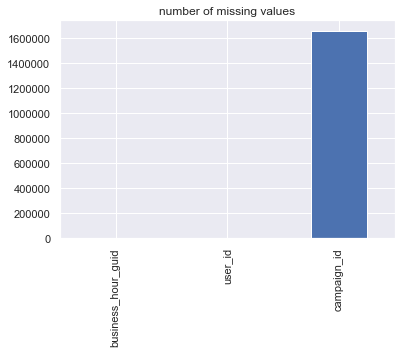

In [47]:
dfOridt.isnull().sum().plot(kind='bar',title='number of missing values') # 檢查空值

In [25]:
dfOridt = dfOridt.drop(columns=['user_id'])  

In [26]:
dfOridt = dfOridt.fillna(0) #補空值

### 以數值1代表優惠,0代表無優惠 - 方法一

In [28]:
dfOridt.campaign_id[dfOridt["campaign_id"]>0]=1

C:\Users\yscys\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### 以數值1代表優惠,0代表無優惠 - 方法二

In [33]:
def trans(x):
    if x > 0:
        return 1
    else:
        return 0

In [34]:
dfOridt["discount"]=dfOridt["campaign_id"].apply(trans)

### 查看各檔次優惠情況

In [35]:
dfOridt.groupby('business_hour_guid')['campaign_id'].sum()

business_hour_guid
00000793-A001-4C8C-9196-3E6971181246       0.0
00001911-C3DF-4143-BC25-8AA5FA1A9AF4       7.0
00001928-AE75-4AA9-8A47-4BDE96D08C2D      31.0
00004599-A7B5-404C-AC84-8AA030B18D3E       8.0
0000E985-1260-4A96-8A1B-9E899FB0E340      12.0
0001181C-4B32-476B-9191-B4062B828DF0       2.0
00011FEF-02D8-42D7-9D4D-CE41AE478DA0      63.0
00014918-A6D8-4DB1-B191-56B4AFB2F879     221.0
0001BD2F-F107-4CF4-A31B-FE2683003ECB      28.0
00026231-055A-4EBC-9DAF-509FB78C8130       9.0
00027282-5A15-4917-9478-C771BA3D0017       5.0
0002F1CB-7B7D-41AA-A3B8-75AF041C287F      17.0
00030A11-34C0-4078-8261-01625408FD41    2324.0
000320A0-5FD9-40AE-9A90-6AFC0862C414       1.0
0003D611-BFB5-4B74-92FE-AAEC64250ED8     154.0
0003ECA9-9F6A-4E28-8AB7-76F0162263DC      59.0
00047226-460C-43C0-B4D3-5D3D70859900     190.0
00049E2E-3235-4E8A-A9BF-5405B75C750B      27.0
0004F0D1-865C-4CF2-A85A-D24DE23B2055     294.0
0004FE74-C8DB-4CE3-9DA0-5BBD6F21064B     243.0
0005211B-77C1-41BF-80C8-F5612628B392     

### 依檔次分組

In [37]:
bhg=dfOridt.groupby('business_hour_guid')['campaign_id'].sum().to_frame()

### 以數值1代表優惠,0代表無優惠 - 方法一

In [38]:
bhg.campaign_id[bhg["campaign_id"]>0]=1

### 以數值1代表優惠,0代表無優惠 - 方法二

In [39]:
def change(x):
    if x > 0:
        return 1
    else:
        return 0

In [40]:
bhg["campaign_id"]=bhg["campaign_id"].apply(change)
bhg.head(10)

,campaign_id
business_hour_guid,
00000793-A001-4C8C-9196-3E6971181246,0
00001911-C3DF-4143-BC25-8AA5FA1A9AF4,1
00001928-AE75-4AA9-8A47-4BDE96D08C2D,1
00004599-A7B5-404C-AC84-8AA030B18D3E,1
0000E985-1260-4A96-8A1B-9E899FB0E340,1
0001181C-4B32-476B-9191-B4062B828DF0,1
00011FEF-02D8-42D7-9D4D-CE41AE478DA0,1
00014918-A6D8-4DB1-B191-56B4AFB2F879,1
0001BD2F-F107-4CF4-A31B-FE2683003ECB,1


In [41]:
bhg.to_csv('Result.csv')

In [44]:
result =pd.read_csv("Result.csv")
result.head(50)

,business_hour_guid,campaign_id
0,00000793-A001-4C8C-9196-3E6971181246,0
1,00001911-C3DF-4143-BC25-8AA5FA1A9AF4,1
2,00001928-AE75-4AA9-8A47-4BDE96D08C2D,1
3,00004599-A7B5-404C-AC84-8AA030B18D3E,1
4,0000E985-1260-4A96-8A1B-9E899FB0E340,1
5,0001181C-4B32-476B-9191-B4062B828DF0,1
6,00011FEF-02D8-42D7-9D4D-CE41AE478DA0,1
7,00014918-A6D8-4DB1-B191-56B4AFB2F879,1
8,0001BD2F-F107-4CF4-A31B-FE2683003ECB,1
9,00026231-055A-4EBC-9DAF-509FB78C8130,1
